<a href="https://colab.research.google.com/github/GiliardGodoi/bioinfo-sars-cov2-datasets/blob/main/EstudoCaso_1_FeatureImportanceChaosGameTheoryRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
help(geometric_mean_score)

Help on function geometric_mean_score in module imblearn.metrics._classification:

geometric_mean_score(y_true, y_pred, labels=None, pos_label=1, average='multiclass', sample_weight=None, correction=0.0)
    Compute the geometric mean.
    
    The geometric mean (G-mean) is the root of the product of class-wise
    sensitivity. This measure tries to maximize the accuracy on each of the
    classes while keeping these accuracies balanced. For binary classification
    G-mean is the squared root of the product of the sensitivity
    and specificity. For multi-class problems it is a higher root of the
    product of sensitivity for each class.
    
    For compatibility with other imbalance performance measures, G-mean can be
    calculated for each class separately on a one-vs-rest basis when
    ``average != 'multiclass'``.
    
    The best value is 1 and the worst value is 0. Traditionally if at least one
    class is unrecognized by the classifier, G-mean resolves to zero. To
    al

In [ ]:
import os
from os import path

import pandas as pd
import numpy as np

In [ ]:
from matplotlib import pyplot as plt 
import seaborn as sns

In [ ]:
base_folder = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2"
features_folder = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed"

assert path.exists(features_folder)

folders = os.listdir(features_folder)

folders

['1-covid', '2-other-viruses']

In [ ]:
case_study = path.join(features_folder, folders[0])

print(case_study,'\n')

files = os.listdir(case_study)

files

/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed/1-covid 



['chaos-game-theory_r4.csv',
 'complex-network-k3l10.csv',
 'fourier-class-r5.csv',
 'shannon-entropy-k12.csv']

In [ ]:
file = files[0]

print('loading data from...', file)

frame = pd.read_csv(path.join(case_study, file))

print('Shape ', frame.shape)

frame.head()

loading data from... chaos-game-theory_r4.csv
Shape  (1717, 21)


,nameseq,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
0,MN369046,0.001427,0.000198,22.960556,3.038274e-09,6.321651e+06,485164.755079,0.139555,0.139558,0.000043,0.000076,0.000198,0.000495,22.960556,0.019476,0.000418,0.000209,97.774348,0.026427,0.155888,0
1,MN306046,0.001437,0.000198,23.269725,3.224093e-08,6.325157e+06,487790.539856,0.140927,0.140930,0.000041,0.000077,0.000198,0.000501,23.269725,0.019861,0.000424,0.000212,98.084045,0.026365,0.154048,0
2,MF542265,0.001437,0.000201,23.267664,1.049310e-09,6.323645e+06,486960.492750,0.140912,0.140915,0.000042,0.000078,0.000201,0.000507,23.267664,0.019857,0.000429,0.000214,98.046509,0.026316,0.155208,0
3,KY983587,0.001444,0.000200,23.252662,1.155165e-08,6.286978e+06,484314.805845,0.140915,0.140917,0.000043,0.000077,0.000200,0.000507,23.252662,0.019858,0.000430,0.000215,97.608601,0.026467,0.156597,0
4,KY621348,0.001447,0.000202,23.165964,4.629677e-08,6.251001e+06,481149.223571,0.140624,0.140627,0.000042,0.000077,0.000202,0.000516,23.165964,0.019776,0.000439,0.000220,97.174864,0.026559,0.159342,0


In [ ]:
rows, columns = frame.shape

X = frame.iloc[:,1:(columns-1)]
y   = frame.iloc[:, -1]

labels = frame['label']

train, test, train_labels, test_labels = train_test_split(X, y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=labels)

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
test =  scaler.transform(test)

print(train.shape)
print(test.shape)

(1201, 19)
(516, 19)


In [ ]:
model = RandomForestClassifier(random_state=63, n_estimators=100)

model.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=63, verbose=0,
                       warm_start=False)

In [ ]:
predicted = model.predict(test)

In [ ]:
confusion_matrix(test_labels, predicted, labels=[1, 0])

array([[395,   0],
       [  0, 121]])

In [ ]:
geometric_mean_score(test_labels, predicted)

1.0

In [ ]:
model.feature_importances_

array([0.02162882, 0.08002052, 0.06794635, 0.        , 0.0655521 ,
       0.05475937, 0.03947621, 0.07531261, 0.06923064, 0.03887251,
       0.06902853, 0.08560751, 0.06736139, 0.10852537, 0.05161752,
       0.03207595, 0.02548928, 0.02557459, 0.02192073])

In [ ]:
indices = np.argsort(model.feature_importances_)[::-1]

len(indices)

19

In [ ]:
attributes = list(frame.columns)

attributes.remove('nameseq')
attributes.remove('label')

len(attributes)

19

In [ ]:
for i in range(X.shape[1]):
  print(i+1, attributes[indices[i]], indices[i], model.feature_importances_[indices[i]])
  if i > 10:
    break

1 variance 13 0.10852537058291706
2 percentile75 11 0.08560750862209231
3 median 1 0.08002052427287808
4 population_standard_deviation 7 0.07531261472649767
5 percentile15 8 0.06923063834702309
6 percentile50 10 0.0690285300349906
7 maximum 2 0.06794634661506853
8 amplitude 12 0.06736138961844382
9 peak 4 0.06555210473436586
10 none_levated_peak 5 0.05475936791414707
11 interquartile_range 14 0.051617517250127254
12 sample_standard_deviation 6 0.039476207736451385


Text(0.5, 0, 'Features')

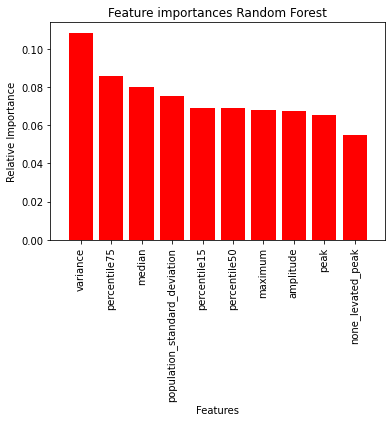

In [ ]:

plt.figure()

col_order = [attributes[i] for i in indices]
feature_importance = model.feature_importances_[indices]

max_indice = 10
interval = slice(max_indice)

plt.title("Feature importances Random Forest")
plt.bar(range(max_indice), feature_importance[interval], color="r", align="center")
plt.xlim([-1, max_indice])
plt.xticks(range(max_indice), col_order[interval], rotation='vertical')

plt.ylabel('Relative Importance')
plt.xlabel('Features')
# plt.show()

--- 

## Test with most importante features

In [ ]:
selected_features = ['variance', 'percentile75', 'label']


In [ ]:
print('loading data from...', file)

frame = pd.read_csv(path.join(case_study, file))[selected_features]

print('Shape ', frame.shape)

frame.head()

loading data from... chaos-game-theory_r4.csv
Shape  (1717, 3)


,variance,percentile75,label
0,0.019476,0.000495,0
1,0.019861,0.000501,0
2,0.019857,0.000507,0
3,0.019858,0.000507,0
4,0.019776,0.000516,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


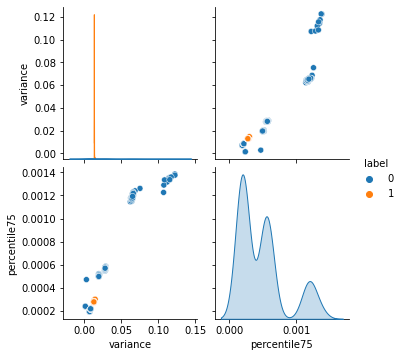

In [ ]:
sns.pairplot(frame, hue='label')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


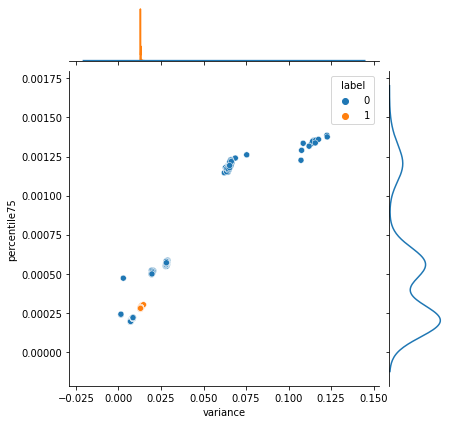

In [ ]:
g = sns.JointGrid(data=frame, x=selected_features[0], y=selected_features[1], hue='label')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

In [ ]:
rows, columns = frame.shape

X = frame.drop(labels=['label'], axis=1)
y   = frame['label']

labels = frame['label']

train, test, train_labels, test_labels = train_test_split(X, y,
                                                          test_size=0.3,
                                                          random_state=42,
                                                          stratify=labels)

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
test =  scaler.transform(test)

print(train.shape)
print(test.shape)

(1201, 2)
(516, 2)


In [ ]:
X.head()

,variance,percentile75
0,0.019476,0.000495
1,0.019861,0.000501
2,0.019857,0.000507
3,0.019858,0.000507
4,0.019776,0.000516


In [ ]:
model = RandomForestClassifier(random_state=63, n_estimators=100)

model.fit(train, train_labels)

predicted = model.predict(test)

In [ ]:
confusion_matrix(test_labels, predicted, labels=[0, 1])

array([[121,   0],
       [  0, 395]])

In [ ]:
geometric_mean_score(test_labels, predicted)

1.0